In [14]:
import pandas as pd
import re

# Load WhatsApp export files
with open("chat1.txt", encoding="utf-8") as f1, open("chat2.txt", encoding="utf-8") as f2:
    raw = f1.read() + "\n" + f2.read()

# Extract messages using regex
pattern = r'\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] (.*?): (.+)'
matches = re.findall(pattern, raw)
df = pd.DataFrame(matches, columns=['date', 'time', 'sender', 'message'])

# Convert to datetime
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['date', 'time'], axis=1, inplace=True)


In [15]:
import pandas as pd
import re

# Load WhatsApp export files
with open("chat1.txt", encoding="utf-8") as f1, open("chat2.txt", encoding="utf-8") as f2:
    raw = f1.read() + "\n" + f2.read()

# Extract messages using regex
pattern = r'\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] (.*?): (.+)'
matches = re.findall(pattern, raw)
df = pd.DataFrame(matches, columns=['date', 'time', 'sender', 'message'])

# Convert to datetime
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['date', 'time'], axis=1, inplace=True)


In [16]:
import emoji
import string
from textblob import TextBlob

df['weekday'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['length'] = df['message'].apply(len)
df['sentiment'] = df['message'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['emojis'] = df['message'].apply(lambda text: ''.join(c for c in text if c in emoji.EMOJI_DATA))
df['mentions_caleb'] = df['message'].str.contains(r'\bcaleb\b', case=False)


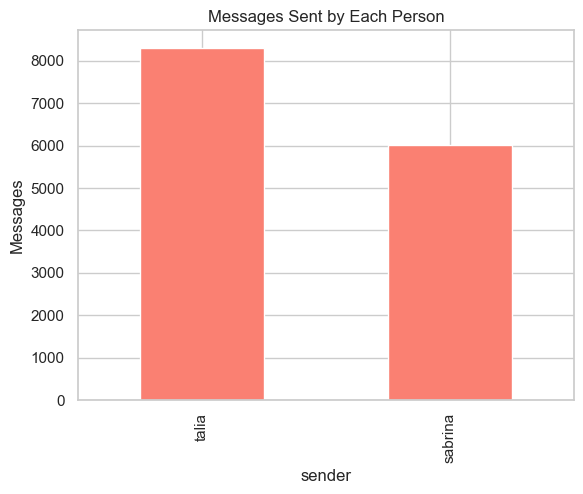

In [9]:
data['sender'].value_counts().plot(kind='bar', color='salmon', title='Messages Sent by Each Person')
plt.ylabel("Messages")
plt.show()


In [17]:
print("Total messages:\n", df['sender'].value_counts())
print("\nFirst message:", df['timestamp'].min())
print("Longest message gap (hours):", df['timestamp'].sort_values().diff().max())
print("\nMost active day:\n", df['weekday'].value_counts())
print("\nMost active hour:\n", df['hour'].value_counts().sort_index())


Total messages:
 sender
Sabrina        6014
~Talia✨        4270
Talia Reddy    4036
Name: count, dtype: int64

First message: 2021-02-27 03:57:48
Longest message gap (hours): 324 days 16:37:13

Most active day:
 weekday
Sunday       2727
Monday       2288
Friday       2054
Wednesday    1948
Tuesday      1904
Thursday     1900
Saturday     1499
Name: count, dtype: int64

Most active hour:
 hour
0      119
1       33
2       13
3        9
4        1
5       12
6       73
7      200
8      455
9      716
10     647
11     908
12     879
13     692
14     872
15     944
16    1330
17    1425
18    1683
19    1262
20     988
21     411
22     335
23     313
Name: count, dtype: int64


In [18]:
from collections import Counter

talia_df = df[df['sender'] == 'talia']
talia_words = ' '.join(talia_df['message']).lower().translate(str.maketrans('', '', string.punctuation)).split()
word_counts = Counter(talia_words)

print("\nTop Talia words:\n", word_counts.most_common(15))
print("\nTop Talia emojis:\n", Counter(''.join(talia_df['emojis'])).most_common(10))
print("\nMentions of 'Caleb':", df['mentions_caleb'].sum())



Top Talia words:
 []

Top Talia emojis:
 []

Mentions of 'Caleb': 91


In [25]:
taliaisms = {w: c for w, c in word_counts.items() if c >= 3 and w not in ['the', 'that', 'with', 'this', 'have', 'just', 'from', 'your', 'about', 'really']}

print("\nTalia-isms:\n", taliaisms)



Talia-isms:
 {}


In [26]:
print(Counter(talia_words).most_common(50))


[]


In [20]:
df['month'] = df['timestamp'].dt.to_period('M')
avg_length = df.groupby('month')['length'].mean()
avg_sentiment = df.groupby('month')['sentiment'].mean()

print("\nAverage message length over time:\n", avg_length.tail())
print("\nSentiment trend over time:\n", avg_sentiment.tail())



Average message length over time:
 month
2024-12    24.370904
2025-01    21.416168
2025-02    19.447887
2025-03    21.566667
2025-04    21.985149
Freq: M, Name: length, dtype: float64

Sentiment trend over time:
 month
2024-12    0.058084
2025-01    0.088950
2025-02    0.054950
2025-03    0.059738
2025-04    0.080967
Freq: M, Name: sentiment, dtype: float64


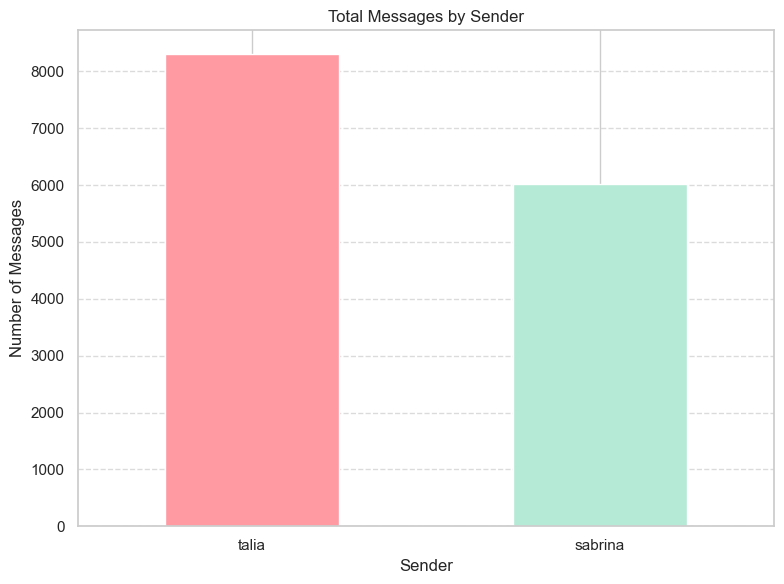

In [23]:
# Re-standardise sender names to merge variants
df['sender'] = df['sender'].str.strip().str.lower()
df['sender'] = df['sender'].apply(
    lambda x: 'talia' if 'talia' in x else ('sabrina' if 'sabrina' in x else x)
)

# Total messages by sender
msg_counts = df['sender'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
msg_counts.plot(kind='bar', color=['#ff9aa2', '#b5ead7'])  # Customize colors as you like
plt.title("Total Messages by Sender")
plt.xlabel("Sender")
plt.ylabel("Number of Messages")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


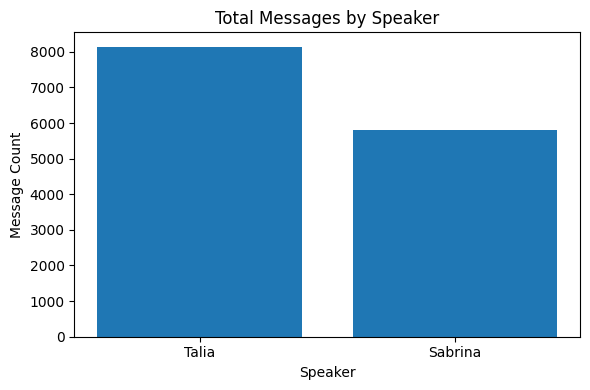

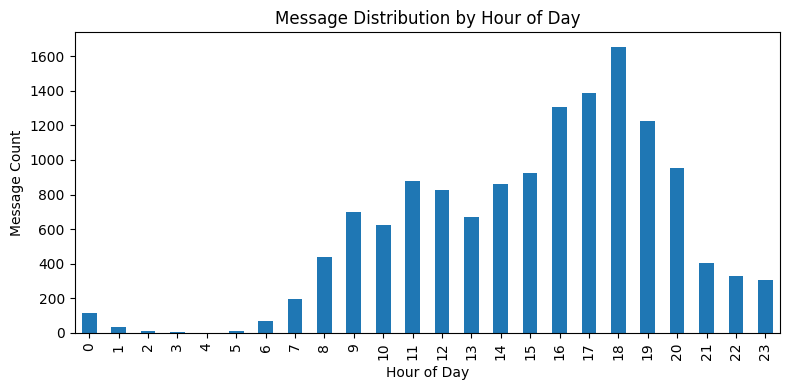

ModuleNotFoundError: No module named 'ace_tools'

In [4]:
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt

# Function to parse chat files
def parse_chat(file_path):
    data = []
    pattern = re.compile(r'^\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] ([^:]+): (.*)$')
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            match = pattern.match(line)
            if match:
                date_str, time_str, speaker, message = match.groups()
                # filter out system messages
                if "Messages and calls are end-to-end encrypted" in message:
                    continue
                if "image omitted" in message.lower():
                    continue
                if "video omitted" in message.lower():
                    continue
                if "audio omitted" in message.lower():
                    continue
                # unify speaker names
                if speaker.startswith("~Talia"):
                    speaker = "Talia"
                elif speaker == "Talia Reddy":
                    speaker = "Talia"
                data.append({
                    'timestamp': datetime.strptime(date_str + ' ' + time_str, '%d/%m/%Y %H:%M:%S'),
                    'speaker': speaker,
                    'message': message
                })
    return pd.DataFrame(data)

# Parse both chat files
chat1 = parse_chat('chat1.txt')
chat2 = parse_chat('chat2.txt')

# Combine and sort
df = pd.concat([chat1, chat2], ignore_index=True).sort_values('timestamp')

# Add hour column
df['hour'] = df['timestamp'].dt.hour

# Compute message counts per speaker
msg_counts = df['speaker'].value_counts().reset_index()
msg_counts.columns = ['speaker', 'count']

# Plot message counts
plt.figure(figsize=(6,4))
plt.bar(msg_counts['speaker'], msg_counts['count'])
plt.title('Total Messages by Speaker')
plt.xlabel('Speaker')
plt.ylabel('Message Count')
plt.tight_layout()
plt.show()

# Plot message distribution by hour
plt.figure(figsize=(8,4))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Message Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Message Count')
plt.tight_layout()
plt.show()

# Display summary dataframe
summary = pd.DataFrame({
    'Metric': ['Total messages', 'Unique Speakers', 'Time Span'],
    'Value': [len(df), df['speaker'].nunique(),
              f"{df['timestamp'].min().date()} to {df['timestamp'].max().date()}"]
})

import ace_tools as tools; tools.display_dataframe_to_user(name="Chat Summary Metrics", dataframe=summary)


In [ ]:
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import ace_tools as tools

# Function to parse chat files
def parse_chat(file_path):
    data = []
    pattern = re.compile(r'^\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] ([^:]+): (.*)$')
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            match = pattern.match(line)
            if match:
                date_str, time_str, speaker, message = match.groups()
                # skip system messages and omitted media
                if "encrypted" in message or "omitted" in message.lower():
                    continue
                if speaker.startswith("~Talia"):
                    speaker = "Talia"
                elif speaker == "Talia Reddy":
                    speaker = "Talia"
                data.append({
                    'timestamp': datetime.strptime(date_str + ' ' + time_str, '%d/%m/%Y %H:%M:%S'),
                    'speaker': speaker,
                    'message': message
                })
    return pd.DataFrame(data)

# Parse and combine
chat1 = parse_chat('/mnt/data/chat1.txt')
chat2 = parse_chat('/mnt/data/chat2.txt')
df = pd.concat([chat1, chat2], ignore_index=True).sort_values('timestamp').reset_index(drop=True)

# 1. Count "Caleb" mentions
caleb_count = df['message'].str.count(r'\bcaleb\b', flags=re.IGNORECASE).sum()

# 2. Compute response times
talia_times = []
sabrina_times = []
for i in range(1, len(df)):
    prev, curr = df.loc[i-1], df.loc[i]
    delta = (curr['timestamp'] - prev['timestamp']).total_seconds()
    if prev['speaker'] == 'Sabrina' and curr['speaker'] == 'Talia':
        talia_times.append(delta)
    elif prev['speaker'] == 'Talia' and curr['speaker'] == 'Sabrina':
        sabrina_times.append(delta)

avg_talia_resp = pd.to_timedelta(sum(talia_times)/len(talia_times), unit='s')
avg_sabrina_resp = pd.to_timedelta(sum(sabrina_times)/len(sabrina_times), unit='s')

# 3. Find longest gap
diffs = df['timestamp'].diff().dropna()
max_gap = pd.to_timedelta(diffs.max())
idx = diffs.idxmax()
gap_start = df.loc[idx-1, 'timestamp']
gap_end = df.loc[idx, 'timestamp']

# 4. Top words in Talia's messages
talia_msgs = df[df['speaker']=='Talia']['message'].str.lower().str.cat(sep=' ')
words = re.findall(r'\b\w+\b', talia_msgs)
stopwords = set(['the','and','to','i','you','a','it','of','in','that','for','is','me','so','on','my','with','was','but','this','not','be'])
filtered = [w for w in words if w not in stopwords and len(w)>2]
freq = Counter(filtered).most_common(20)
words, counts = zip(*freq)

# Plot word frequencies
plt.figure(figsize=(8, 6))
plt.barh(words[::-1], counts[::-1])
plt.title("Top 20 Words in Talia's Messages")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

# Display a summary dataframe
metrics = pd.DataFrame({
    'Metric': [
        'Caleb mentions',
        'Avg Talia response',
        'Avg Sabrina response',
        'Longest gap',
        'Gap start',
        'Gap end'
    ],
    'Value': [
        caleb_count,
        str(avg_talia_resp),
        str(avg_sabrina_resp),
        str(max_gap),
        gap_start,
        gap_end
    ]
})

tools.display_dataframe_to_user(name="Additional Chat Metrics", dataframe=metrics)


ModuleNotFoundError: No module named 'ace_tools'

: 